#  IDA PROJECT


Importing all modules

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Loading the training and test data set

In [2]:
amex_df = pd.read_csv('Training Data_2021.csv',low_memory=False)
amex_test_df = pd.read_csv('Test Data_2021.csv',low_memory=False)

In [3]:
amex_df

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
0,230032,1696,1.6541,0.000,0.0,0.0,0,6015,322,40369,...,1,73.78,82.547,0.08696,10,0.63899,na,0,C,0
1,230033,1846,0.8095,0.000,0.0,0.0,102,7532,3171,18234,...,0,99.129,missing,0,13,0.63836,na,na,L,1
2,230034,1745,0.4001,0.000,0.0,0.0,missing,2536,missing,missing,...,0,missing,29.29,0,1,1.00000,na,0,C,1
3,230035,1739,0.2193,0.000,0.0,0.0,1982,26440,4955,20316,...,0,96.272,missing,0.15385,3,0.53241,0,0,L,0
4,230036,1787,0.0118,0.225,0.0,0.0,5451,5494,5494,7987,...,0,115.019,missing,0,1,0.92665,na,na,L,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82995,578064,1748,0.3044,0.000,0.0,0.0,0,20114,5574,77386,...,0,missing,8.445,0.04348,13,0.48002,0,0,L,0
82996,578065,1846,NaN,0.000,0.0,0.0,793,18608,18608,63820,...,0,missing,missing,0,5,0.46925,na,0,L,0
82997,578066,1907,0.0381,0.000,0.0,0.0,2478,24775,24775,100294,...,0,137.164,42.857,0,19,0.67960,na,0,L,0
82998,578067,1744,1.8301,0.000,0.0,0.0,496,917,496,116164,...,0,missing,missing,0.09375,3,0.45317,na,0,L,0


In [4]:
amex_test_df

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47
0,578069,1719,0.6174,8.623,0.000,0.000,258,258,258,10729,...,2,0,missing,missing,0.54545,2,0.91837,0,0,C
1,578070,1795,0.2051,0.000,0.000,0.000,1685,12711,8913,80519,...,4,0,missing,missing,0.17241,4,0.94563,0,0,C
2,578071,1742,0.5082,0.000,0.000,0.000,1185,8954,8954,1189,...,1,0,missing,missing,0.64706,1,0.97054,0,0,C
3,578072,1685,0.2595,25.409,0.000,0.000,missing,3354,missing,missing,...,2,0,missing,missing,0.85714,1,1.00000,na,0,C
4,578073,1666,1.2678,0.000,0.000,0.000,570,570,570,missing,...,2,0,missing,101.61,missing,0,0.99617,na,0,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46995,310027,1736,2.1740,0.000,0.000,0.000,11,4248,1577,13379,...,4,0,missing,78.378,0,4,0.43829,na,0,C
46996,310028,1724,0.0000,1.108,0.768,0.000,missing,64041,missing,10926,...,5,0,missing,38.325,0.16667,14,0.57931,0,0,C
46997,310029,1605,0.2901,11.561,0.937,2.976,missing,2277,missing,3964,...,5,2,101.85,93.142,0.5,4,0.42069,na,0,C
46998,310030,1780,1.1874,0.000,0.000,0.000,0,6356,4802,3206,...,8,0,missing,77.022,0.06061,9,0.53251,na,0,L


In [5]:
amex_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47000 entries, 0 to 46999
Data columns (total 48 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   application_key  47000 non-null  int64  
 1   mvar1            47000 non-null  object 
 2   mvar2            43673 non-null  float64
 3   mvar3            46706 non-null  float64
 4   mvar4            46706 non-null  float64
 5   mvar5            46706 non-null  float64
 6   mvar6            47000 non-null  object 
 7   mvar7            47000 non-null  object 
 8   mvar8            47000 non-null  object 
 9   mvar9            47000 non-null  object 
 10  mvar10           47000 non-null  object 
 11  mvar11           47000 non-null  object 
 12  mvar12           47000 non-null  object 
 13  mvar13           47000 non-null  object 
 14  mvar14           47000 non-null  int64  
 15  mvar15           47000 non-null  object 
 16  mvar16           47000 non-null  object 
 17  mvar17      

In [6]:
amex_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83000 entries, 0 to 82999
Data columns (total 49 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   application_key  83000 non-null  int64  
 1   mvar1            83000 non-null  object 
 2   mvar2            77114 non-null  float64
 3   mvar3            82465 non-null  float64
 4   mvar4            82465 non-null  float64
 5   mvar5            82465 non-null  float64
 6   mvar6            83000 non-null  object 
 7   mvar7            83000 non-null  object 
 8   mvar8            83000 non-null  object 
 9   mvar9            83000 non-null  object 
 10  mvar10           83000 non-null  object 
 11  mvar11           83000 non-null  object 
 12  mvar12           83000 non-null  object 
 13  mvar13           83000 non-null  object 
 14  mvar14           83000 non-null  int64  
 15  mvar15           83000 non-null  object 
 16  mvar16           83000 non-null  object 
 17  mvar17      

In [7]:
amex_df.default_ind.value_counts()

0    59145
1    23855
Name: default_ind, dtype: int64

Finding out the categorical columns

In [8]:
category_columns = amex_df.select_dtypes(include = ['object']).columns
category_columns

Index(['mvar1', 'mvar6', 'mvar7', 'mvar8', 'mvar9', 'mvar10', 'mvar11',
       'mvar12', 'mvar13', 'mvar15', 'mvar16', 'mvar17', 'mvar18', 'mvar19',
       'mvar20', 'mvar25', 'mvar26', 'mvar27', 'mvar28', 'mvar29', 'mvar30',
       'mvar31', 'mvar32', 'mvar34', 'mvar35', 'mvar36', 'mvar37', 'mvar38',
       'mvar39', 'mvar40', 'mvar41', 'mvar42', 'mvar43', 'mvar45', 'mvar46',
       'mvar47'],
      dtype='object')

In [9]:
# function for check a number is float or not

def is_number(n):
    try : 
        float(n)
    except:
        return False
    else :
        return True

In [10]:
# finding non numeric values in categorical columns

for col in category_columns:
    values = amex_df[col]
    k = 0
    L = set()

    for i in range(len(values)):
        if (not is_number(values[i])):
            L.add(values[i])
        
    print("category ",col)
    print(L)
    



category  mvar1
{'na'}
category  mvar6
{'missing'}
category  mvar7
{'missing'}
category  mvar8
{'missing'}
category  mvar9
{'missing'}
category  mvar10
{'missing'}
category  mvar11
{'missing'}
category  mvar12
{'missing'}
category  mvar13
{'missing'}
category  mvar15
{'missing'}
category  mvar16
{'na'}
category  mvar17
{'na'}
category  mvar18
{'na'}
category  mvar19
{'na'}
category  mvar20
{'na'}
category  mvar25
{'missing'}
category  mvar26
{'missing'}
category  mvar27
{'missing'}
category  mvar28
{'missing'}
category  mvar29
{'missing'}
category  mvar30
{'missing'}
category  mvar31
{'missing'}
category  mvar32
{'missing'}
category  mvar34
{'na'}
category  mvar35
{'na'}
category  mvar36
{'na'}
category  mvar37
{'na'}
category  mvar38
{'na'}
category  mvar39
{'na'}
category  mvar40
{'missing'}
category  mvar41
{'missing'}
category  mvar42
{'missing'}
category  mvar43
{'na'}
category  mvar45
{'na'}
category  mvar46
{'na'}
category  mvar47
{'L', 'C'}


Changing all non numerical value to Nan

In [11]:
for col in category_columns[:-1]:
    values = amex_df[col]
    k = 0
    L = set()

    for i in range(len(values)):
        if (not is_number(values[i])):
            L.add(values[i])
    L = list(L)   
    amex_df[col] = amex_df[col].replace({L[0]:np.NaN})
    amex_test_df[col] = amex_test_df[col].replace({L[0]:np.NaN})
    

changing the numerical column to type numeric in the training and test data set

In [12]:
amex_df[category_columns[:-1]] = amex_df[category_columns[:-1]].apply(pd.to_numeric)
amex_test_df[category_columns[:-1]] = amex_test_df[category_columns[:-1]].apply(pd.to_numeric)

In [13]:
amex_df["default_ind"] = amex_df["default_ind"].astype('object')


In [14]:
amex_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83000 entries, 0 to 82999
Data columns (total 49 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   application_key  83000 non-null  int64  
 1   mvar1            79267 non-null  float64
 2   mvar2            77114 non-null  float64
 3   mvar3            82465 non-null  float64
 4   mvar4            82465 non-null  float64
 5   mvar5            82465 non-null  float64
 6   mvar6            63299 non-null  float64
 7   mvar7            75326 non-null  float64
 8   mvar8            63291 non-null  float64
 9   mvar9            71318 non-null  float64
 10  mvar10           82465 non-null  float64
 11  mvar11           36283 non-null  float64
 12  mvar12           68422 non-null  float64
 13  mvar13           73311 non-null  float64
 14  mvar14           83000 non-null  int64  
 15  mvar15           49481 non-null  float64
 16  mvar16           63757 non-null  float64
 17  mvar17      

In [15]:
amex_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47000 entries, 0 to 46999
Data columns (total 48 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   application_key  47000 non-null  int64  
 1   mvar1            44772 non-null  float64
 2   mvar2            43673 non-null  float64
 3   mvar3            46706 non-null  float64
 4   mvar4            46706 non-null  float64
 5   mvar5            46706 non-null  float64
 6   mvar6            35703 non-null  float64
 7   mvar7            42521 non-null  float64
 8   mvar8            35698 non-null  float64
 9   mvar9            40188 non-null  float64
 10  mvar10           46705 non-null  float64
 11  mvar11           20482 non-null  float64
 12  mvar12           38603 non-null  float64
 13  mvar13           41193 non-null  float64
 14  mvar14           47000 non-null  int64  
 15  mvar15           28164 non-null  float64
 16  mvar16           35967 non-null  float64
 17  mvar17      

Finding the percentage of missing values in the each column 

In [16]:
amex_df.isnull().sum()/len(amex_df)*100

application_key     0.000000
mvar1               4.497590
mvar2               7.091566
mvar3               0.644578
mvar4               0.644578
mvar5               0.644578
mvar6              23.736145
mvar7               9.245783
mvar8              23.745783
mvar9              14.074699
mvar10              0.644578
mvar11             56.285542
mvar12             17.563855
mvar13             11.673494
mvar14              0.000000
mvar15             40.384337
mvar16             23.184337
mvar17             19.878313
mvar18             18.504819
mvar19              0.006024
mvar20              0.644578
mvar21             28.267470
mvar22             36.949398
mvar23             50.977108
mvar24             23.530120
mvar25              9.472289
mvar26             13.167470
mvar27             16.445783
mvar28              0.644578
mvar29              0.644578
mvar30             45.768675
mvar31             70.528916
mvar32              9.472289
mvar33              2.251807
mvar34        

<AxesSubplot:>

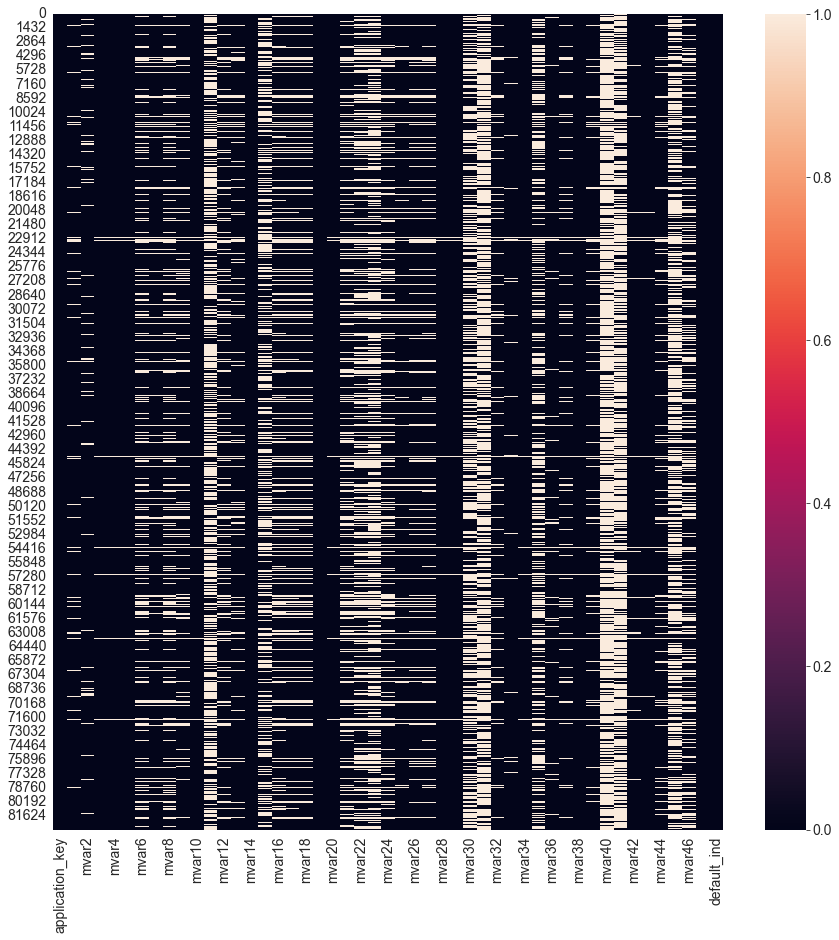

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(amex_df.isnull())

In [18]:
columns =  amex_df.columns

In [19]:
columns

Index(['application_key', 'mvar1', 'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6',
       'mvar7', 'mvar8', 'mvar9', 'mvar10', 'mvar11', 'mvar12', 'mvar13',
       'mvar14', 'mvar15', 'mvar16', 'mvar17', 'mvar18', 'mvar19', 'mvar20',
       'mvar21', 'mvar22', 'mvar23', 'mvar24', 'mvar25', 'mvar26', 'mvar27',
       'mvar28', 'mvar29', 'mvar30', 'mvar31', 'mvar32', 'mvar33', 'mvar34',
       'mvar35', 'mvar36', 'mvar37', 'mvar38', 'mvar39', 'mvar40', 'mvar41',
       'mvar42', 'mvar43', 'mvar44', 'mvar45', 'mvar46', 'mvar47',
       'default_ind'],
      dtype='object')

In [20]:
category_columns = amex_df.select_dtypes(include = ['object']).columns
category_columns

Index(['mvar47', 'default_ind'], dtype='object')

In [21]:
numeric_columns = amex_df.select_dtypes(include = ['number']).columns
len(numeric_columns)

47

Correlation matrix

In [22]:
correlation = amex_df.corr()

In [23]:
correlation[correlation >0.7]

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar37,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46
application_key,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mvar1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mvar2,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mvar3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mvar4,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.881711
mvar5,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mvar6,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mvar7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mvar8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mvar9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
amex_df.isnull().sum()

application_key        0
mvar1               3733
mvar2               5886
mvar3                535
mvar4                535
mvar5                535
mvar6              19701
mvar7               7674
mvar8              19709
mvar9              11682
mvar10               535
mvar11             46717
mvar12             14578
mvar13              9689
mvar14                 0
mvar15             33519
mvar16             19243
mvar17             16499
mvar18             15359
mvar19                 5
mvar20               535
mvar21             23462
mvar22             30668
mvar23             42311
mvar24             19530
mvar25              7862
mvar26             10929
mvar27             13650
mvar28               535
mvar29               535
mvar30             37988
mvar31             58539
mvar32              7862
mvar33              1869
mvar34               535
mvar35             34868
mvar36              3159
mvar37              7862
mvar38               535
mvar39              6329


# feature selection

taking the columns which have less than 7 percentage of missing values

In [25]:
input_cols = []
index = amex_df.isnull().sum().index
j =0 ;
for i  in  (amex_df.isnull().sum()/len(amex_df)*100 <7):
    if i:
        input_cols.append(index[j])
    j+=1
        

In [26]:
input_cols


['application_key',
 'mvar1',
 'mvar3',
 'mvar4',
 'mvar5',
 'mvar10',
 'mvar14',
 'mvar19',
 'mvar20',
 'mvar28',
 'mvar29',
 'mvar33',
 'mvar34',
 'mvar36',
 'mvar38',
 'mvar42',
 'mvar43',
 'mvar47',
 'default_ind']

creating 2 data set . one containing the missing values and other with out any missing values

In [27]:
temp_df = amex_df[input_cols].copy()
temp_test_df = amex_test_df[input_cols[:-1]].copy()
temp_test_miss_df = amex_test_df[input_cols[:-1]].copy()
temp_miss_df = amex_df[input_cols].copy()

In [28]:
input_cols = input_cols[1:-1]
input_cols

['mvar1',
 'mvar3',
 'mvar4',
 'mvar5',
 'mvar10',
 'mvar14',
 'mvar19',
 'mvar20',
 'mvar28',
 'mvar29',
 'mvar33',
 'mvar34',
 'mvar36',
 'mvar38',
 'mvar42',
 'mvar43',
 'mvar47']

In [29]:
temp_df[input_cols].isnull().sum()

mvar1     3733
mvar3      535
mvar4      535
mvar5      535
mvar10     535
mvar14       0
mvar19       5
mvar20     535
mvar28     535
mvar29     535
mvar33    1869
mvar34     535
mvar36    3159
mvar38     535
mvar42    2023
mvar43     889
mvar47       0
dtype: int64

<AxesSubplot:>

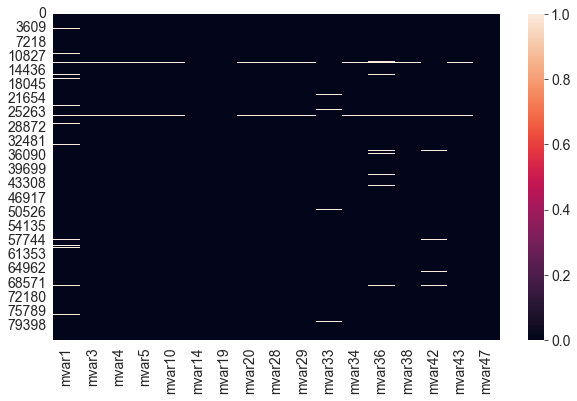

In [30]:
sns.heatmap(temp_df[input_cols].isnull())

In [31]:
temp_test_df[input_cols].isnull().sum()

mvar1     2228
mvar3      294
mvar4      294
mvar5      294
mvar10     295
mvar14       0
mvar19       7
mvar20     295
mvar28     295
mvar29     295
mvar33    1037
mvar34     295
mvar36    1730
mvar38     295
mvar42    1167
mvar43     494
mvar47       0
dtype: int64


### Correlation

Here's how correlation coefficients can be interpreted :

* **Strength**: The greater the absolute value of the correlation coefficient, the stronger the relationship.

    * The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

    * A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.
    
    * When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.


* **Direction**: The sign of the correlation coefficient represents the direction of the relationship.

    * Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.
    
    * Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

Here's the same relationship expressed visually ([source](https://www.cuemath.com/data/how-to-calculate-correlation-coefficient/)):

<img src="https://i.imgur.com/3XUpDlw.png" width="360">

The correlation coefficient has the following formula:

<img src="https://i.imgur.com/unapugP.png" width="360">


In [32]:
temp_df[input_cols].corr()[temp_df[input_cols].corr() > 0.8]

,mvar1,mvar3,mvar4,mvar5,mvar10,mvar14,mvar19,mvar20,mvar28,mvar29,mvar33,mvar34,mvar36,mvar38,mvar42,mvar43
mvar1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mvar3,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mvar4,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mvar5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mvar10,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mvar14,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mvar19,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,0.98533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mvar20,NaN,NaN,NaN,NaN,NaN,NaN,0.98533,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mvar28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mvar29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

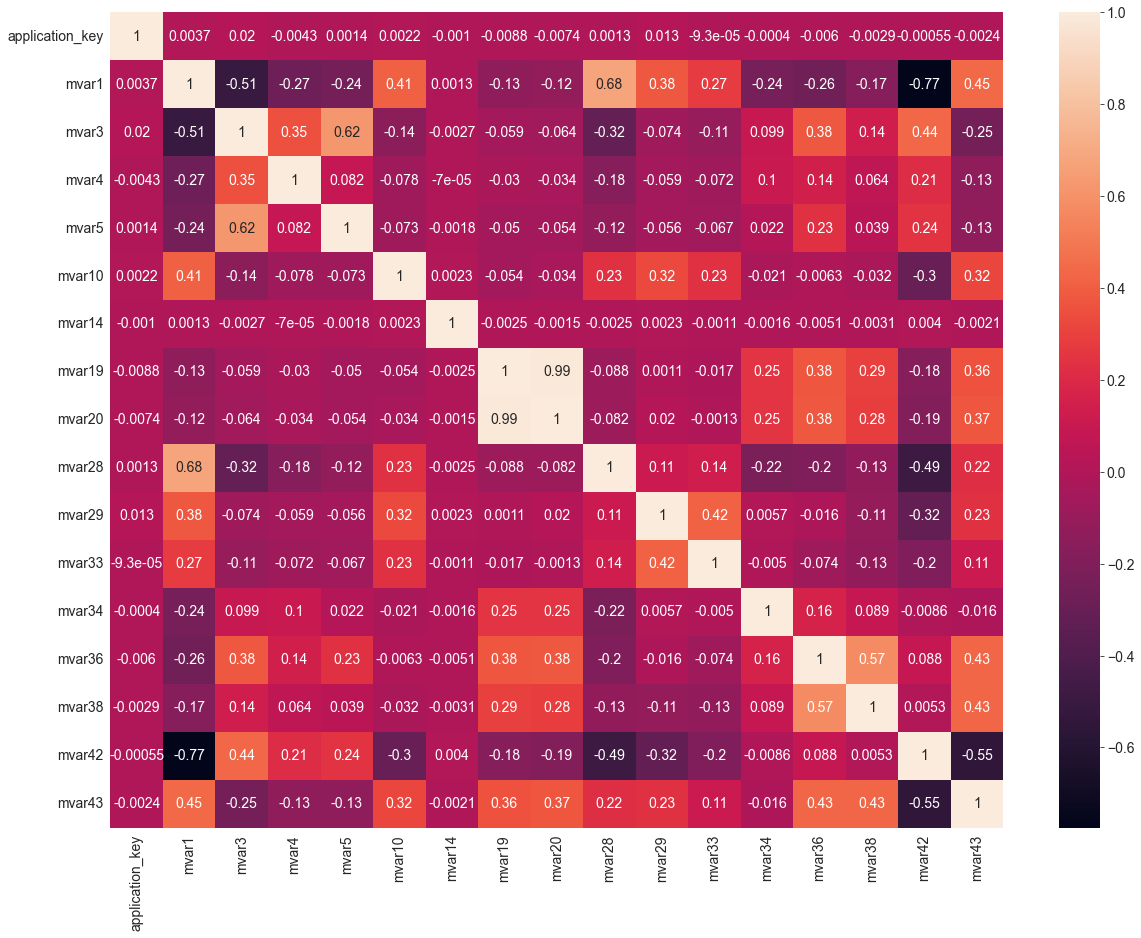

In [33]:
plt.figure(figsize = (20,15))
sns.heatmap(data = temp_df.corr(),annot=True)

<AxesSubplot:xlabel='mvar20', ylabel='mvar19'>

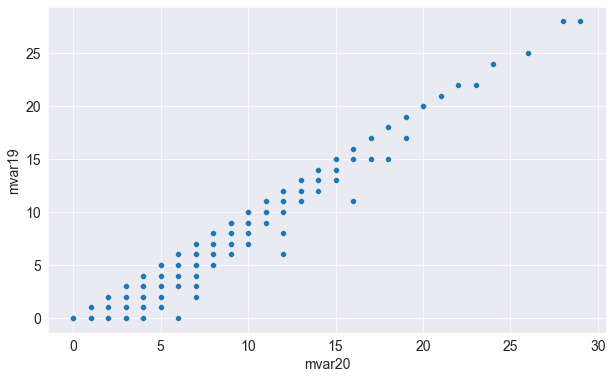

In [34]:
sns.scatterplot(data = temp_df,x="mvar20",y="mvar19")

In [35]:
temp_df.dropna(subset=input_cols,inplace=True)
temp_test_df.dropna(subset=input_cols,inplace=True)

In [36]:
temp_df["default_ind"] = temp_df["default_ind"].apply(pd.to_numeric)

In [37]:
temp_miss_df["default_ind"] = temp_miss_df["default_ind"].apply(pd.to_numeric)

## Training, Validation and Test Sets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique. 


2. **Validation set** - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well.


3. **Test set** - used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.


<img src="https://i.imgur.com/j8eITrK.png" width="480">


As a general rule of thumb you can use around 60% of the data for the training set, 20% for the validation set and 20% for the test set. We have a seperate test set , you can use a 75%-25% training-validation split.

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
train_df, val_df = train_test_split(temp_df, test_size=0.25, random_state=42)
test_df = temp_test_df

In [40]:
train_df.columns

Index(['application_key', 'mvar1', 'mvar3', 'mvar4', 'mvar5', 'mvar10',
       'mvar14', 'mvar19', 'mvar20', 'mvar28', 'mvar29', 'mvar33', 'mvar34',
       'mvar36', 'mvar38', 'mvar42', 'mvar43', 'mvar47', 'default_ind'],
      dtype='object')

In [41]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (56493, 19)
val_df.shape : (18832, 19)
test_df.shape : (42581, 18)


In [42]:
train_df.columns

Index(['application_key', 'mvar1', 'mvar3', 'mvar4', 'mvar5', 'mvar10',
       'mvar14', 'mvar19', 'mvar20', 'mvar28', 'mvar29', 'mvar33', 'mvar34',
       'mvar36', 'mvar38', 'mvar42', 'mvar43', 'mvar47', 'default_ind'],
      dtype='object')

seperating the input columns and output columns

In [43]:
target_col = 'default_ind'
input_cols = train_df.columns[0:-1]
input_cols

Index(['application_key', 'mvar1', 'mvar3', 'mvar4', 'mvar5', 'mvar10',
       'mvar14', 'mvar19', 'mvar20', 'mvar28', 'mvar29', 'mvar33', 'mvar34',
       'mvar36', 'mvar38', 'mvar42', 'mvar43', 'mvar47'],
      dtype='object')

spliting them into seperate trainig and validation inputs

In [44]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [45]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [46]:
test_inputs = test_df[input_cols].copy()


finding the numerical columns and categorical columns in the data set

In [47]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()[1:]
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

## Scaling Numeric Features

Another good practice is to scale numeric features to a small range of values e.g. $(0,1)$ or $(-1,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

The numeric columns in our dataset have varying ranges.



Because different columns have different ranges, we run into two issues:

1. We can't compare the weights of different column to identify which features are important
2. A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.

For this reason, it's common practice to scale (or standardize) the values in numeric column by subtracting the mean and dividing by the standard deviation.

![](https://i.imgur.com/dT5fLFI.png)

We can apply scaling using the StandardScaler class from `scikit-learn`.

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()

In [50]:
scaler.fit(temp_df[numeric_cols])

StandardScaler()

In [51]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

## Encoding Categorical Data

Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column. 

In [52]:
from sklearn.preprocessing import OneHotEncoder

In [53]:
encoder = OneHotEncoder(sparse = False,handle_unknown='ignore')

In [54]:
encoder.fit(temp_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [55]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [56]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

creating final training and validation data set

In [57]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

# Trying different models

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# **Confusion matrix**



A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**


<img src="https://i.imgur.com/UM28BCN.png" width="480">

In [59]:
def predict_and_plot(model,inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    
    print(name + " Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return accuracy*100

# 1. Logistic regression model

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
model = LogisticRegression()

In [62]:
def test_param(**param):
    m = LogisticRegression(**param)
    m.fit(X_train, train_targets)
    k = predict_and_plot(m,X_train, train_targets, 'Training')
    v = predict_and_plot(m,X_val, val_targets, 'Validatiaon')
    return k,v


Training Accuracy: 76.22%
Validatiaon Accuracy: 76.48%


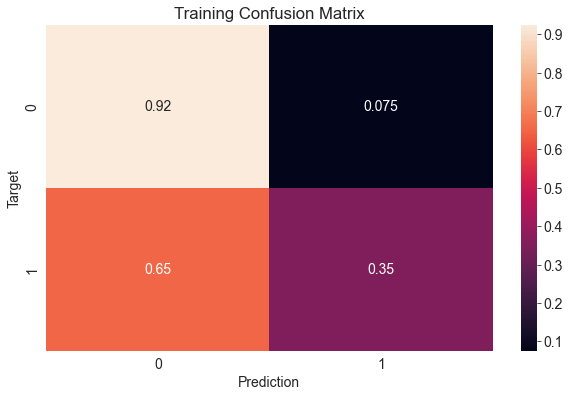

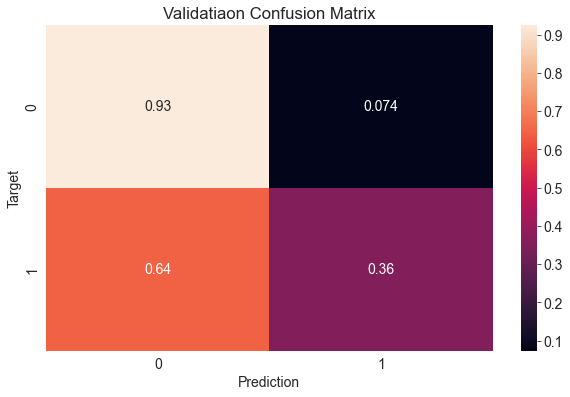

In [63]:
val = test_param(solver = 'liblinear')


Training Accuracy: 76.22%
Validatiaon Accuracy: 76.49%


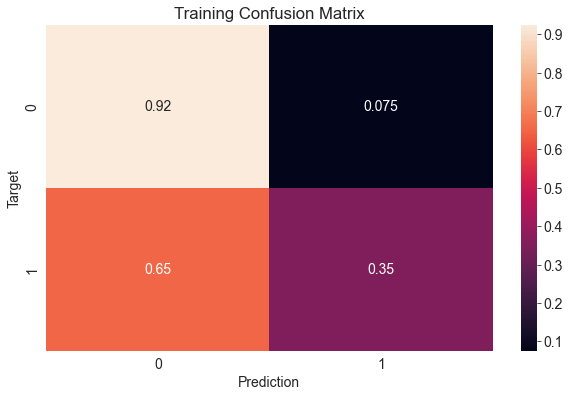

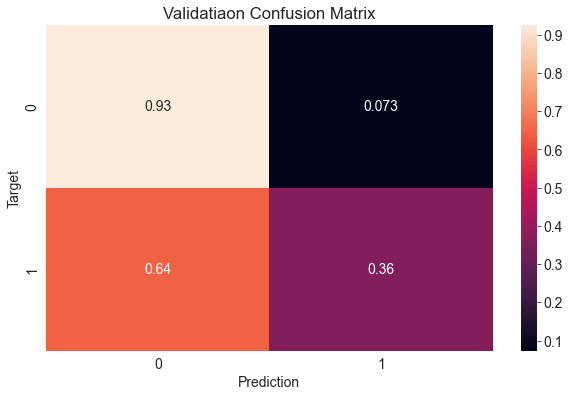

In [64]:
val = test_param(solver ='newton-cg')

Training Accuracy: 76.22%
Validatiaon Accuracy: 76.49%


(76.22006266263077, 76.48683092608326)

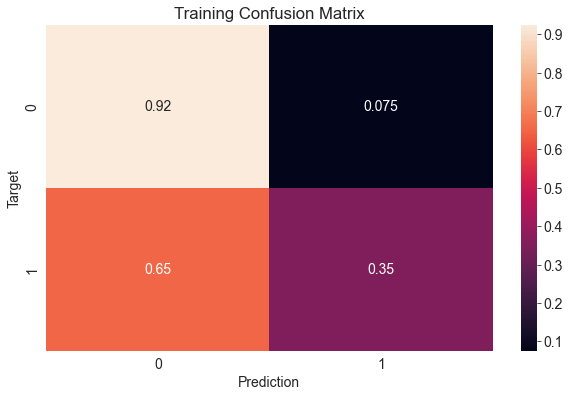

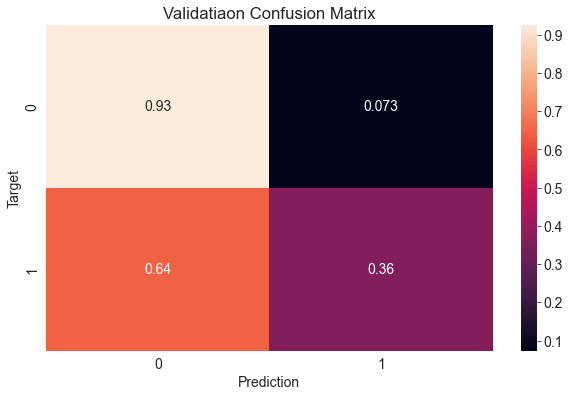

In [65]:
test_param(solver ='lbfgs',max_iter = 1000)


Training Accuracy: 76.22%
Validatiaon Accuracy: 76.49%


(76.2182925318181, 76.48683092608326)

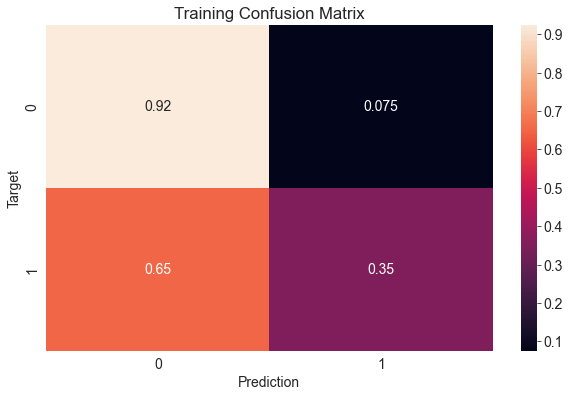

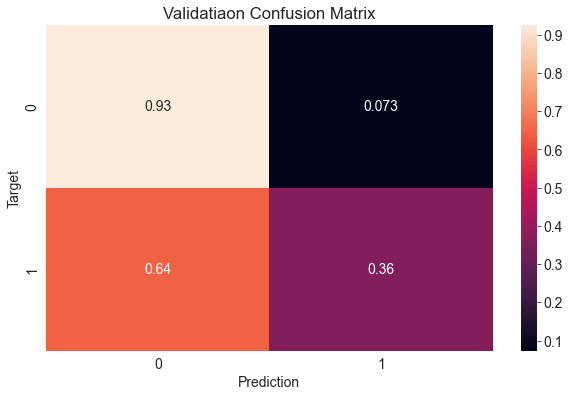

In [66]:
test_param(solver ='saga',max_iter = 1000)


## 2. Naive Bayes

In [67]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB



In [68]:
def test_param(**param):
    m = GaussianNB(**param)
    m.fit(X_train, train_targets)
    k = predict_and_plot(m,X_train, train_targets, 'Training')
    v = predict_and_plot(m,X_val, val_targets, 'Validatiaon')
    return k, v

Training Accuracy: 71.28%
Validatiaon Accuracy: 71.26%


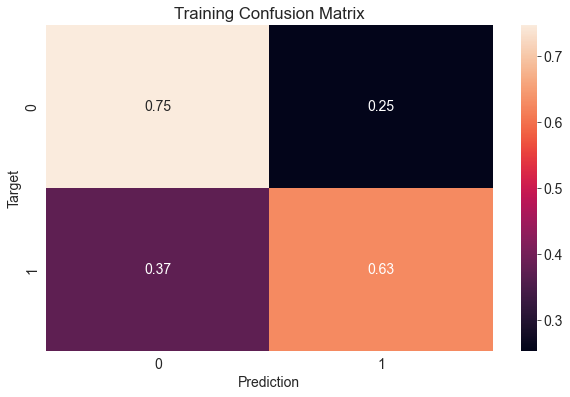

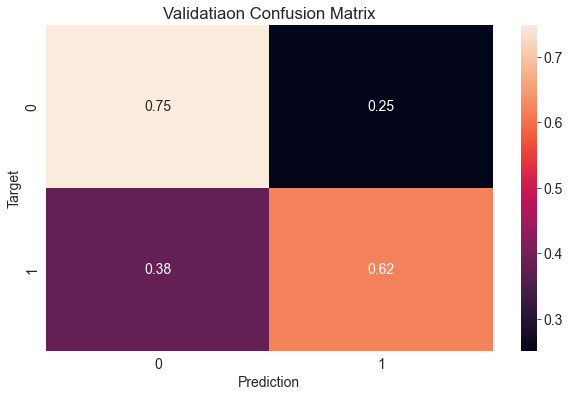

In [69]:
val = test_param()

In [70]:
from sklearn.naive_bayes import BernoulliNB

In [71]:
def test_param(**param):
    m = BernoulliNB(**param)
    m.fit(X_train, train_targets)
    predict_and_plot(m,X_train, train_targets, 'Training')
    predict_and_plot(m,X_val, val_targets, 'Validatiaon')

Training Accuracy: 69.81%
Validatiaon Accuracy: 70.03%


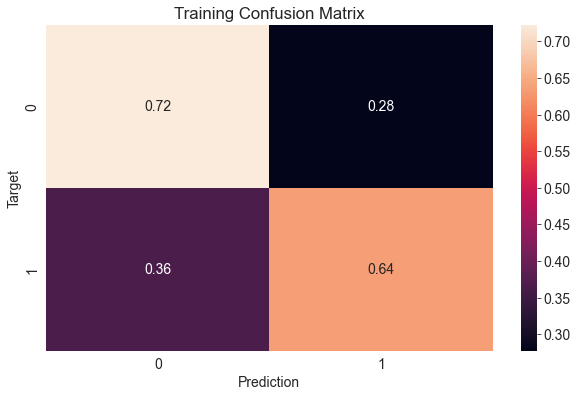

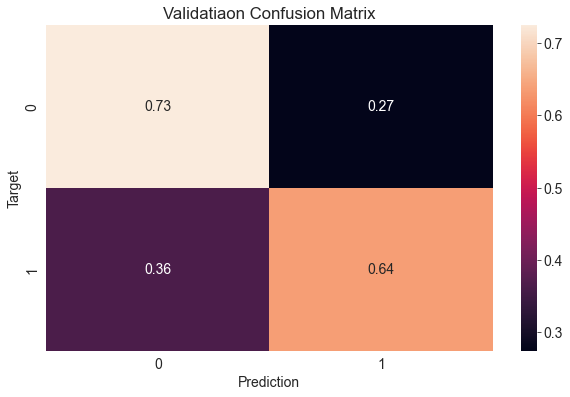

In [72]:
test_param()

## 3. Decision tree model

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
def test_param(**param):
    m = DecisionTreeClassifier(random_state=42,**param)
    m.fit(X_train, train_targets)
    k = predict_and_plot(m,X_train, train_targets, 'Training')
    v = predict_and_plot(m,X_val, val_targets, 'Validatiaon')
    return k ,v


Training Accuracy: 99.99%
Validatiaon Accuracy: 66.99%


(99.99114934593666, 66.98704333050128)

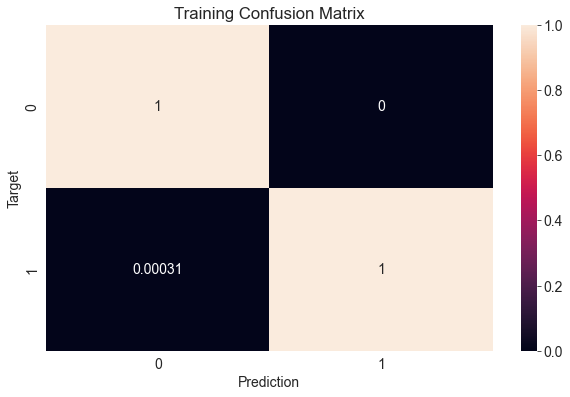

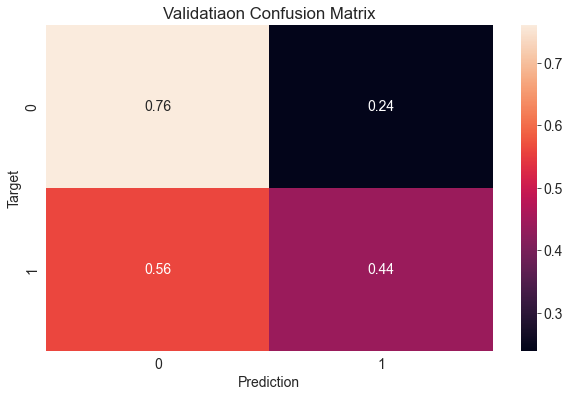

In [75]:
test_param()

# Tuning hyper parameters

In [76]:
def max_depth_error(md):
    model = DecisionTreeClassifier(criterion= "gini",max_depth=md,max_leaf_nodes=33, random_state=42)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc }

In [77]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

Wall time: 4.23 s


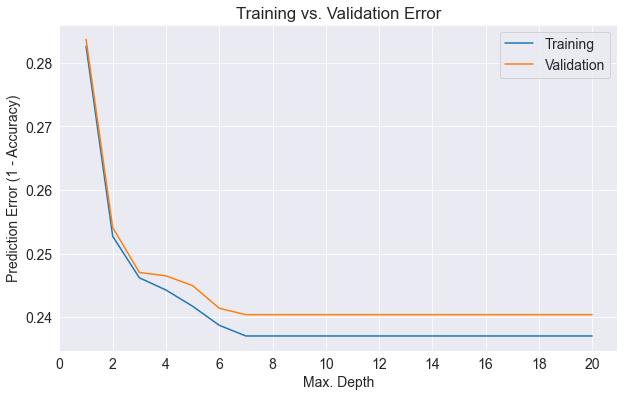

In [78]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [79]:
def max_leaf_nodes_error(mln):
    model = DecisionTreeClassifier(criterion= "gini",max_leaf_nodes=mln, random_state=42)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'Max Leaf Node': mln, 'Training Error': train_acc, 'Validation Error': val_acc }

In [80]:
%%time
errors_df = pd.DataFrame([max_leaf_nodes_error(mln) for mln in range(10, 100)])

Wall time: 22.4 s


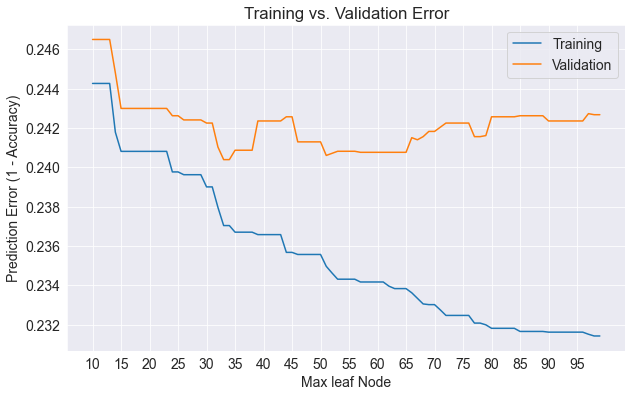

In [81]:
plt.figure()
plt.plot(errors_df['Max Leaf Node'], errors_df['Training Error'])
plt.plot(errors_df['Max Leaf Node'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(10,100, 5))
plt.xlabel('Max leaf Node')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

Training Accuracy: 69.78%
Validatiaon Accuracy: 69.48%


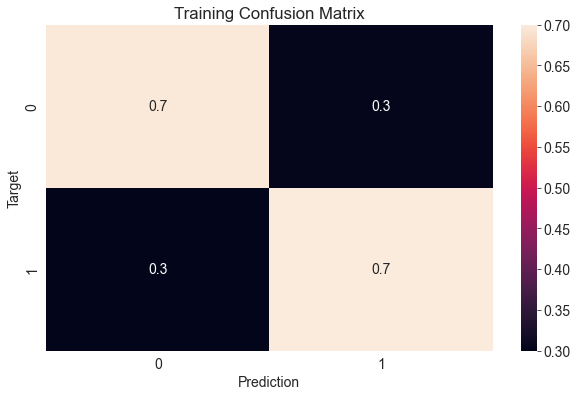

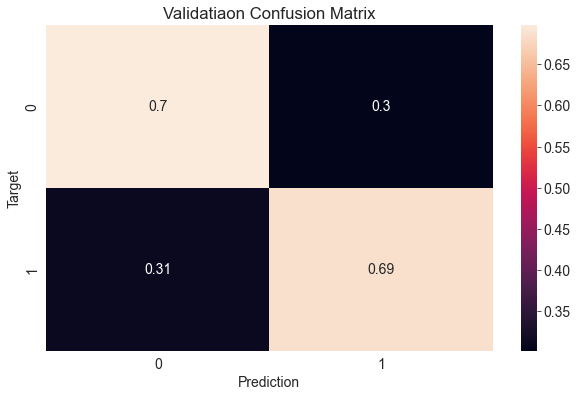

In [82]:
val = test_param(criterion= "gini",max_depth=7,max_leaf_nodes=34,class_weight = {1:2.5,0:1})

## 4. Random Forest Classifier

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
def test_params(params={},**para):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params , **para).fit(X_train, train_targets)
    return model.score(X_train, train_targets), model.score(X_val, val_targets)

In [85]:
test_params()

(0.9998760908431134, 0.7634876805437553)

### Tuning hyper parameters

In [86]:
parameter_list = []

parameter_list.append("max_depth")

In [87]:
def error_df(para , md,parameter={}):
    model_acc = test_params({para:md},**parameter)
    train_acc = 1 - model_acc[0]
    val_acc = 1 - model_acc[1]
    return {para: md, 'Training Error': train_acc, 'Validation Error': val_acc }

In [88]:
%%time
errors_df = pd.DataFrame([error_df("max_depth",md) for md in range(1, 21)])

Wall time: 44.7 s


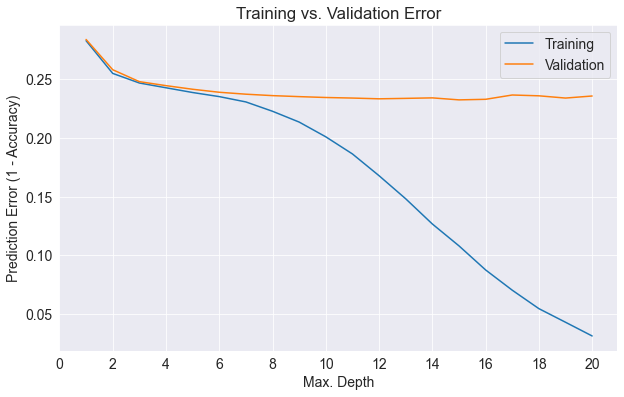

In [89]:
v = parameter_list[0]
plt.figure()
plt.plot(errors_df[v], errors_df['Training Error'])
plt.plot(errors_df[v], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [90]:
best_params = {
    "max_depth" :12
}

In [91]:
parameter_list.append("max_leaf_nodes")

In [92]:
errors_df = pd.DataFrame([error_df("max_leaf_nodes",md,best_params) for md in range(50,150)])

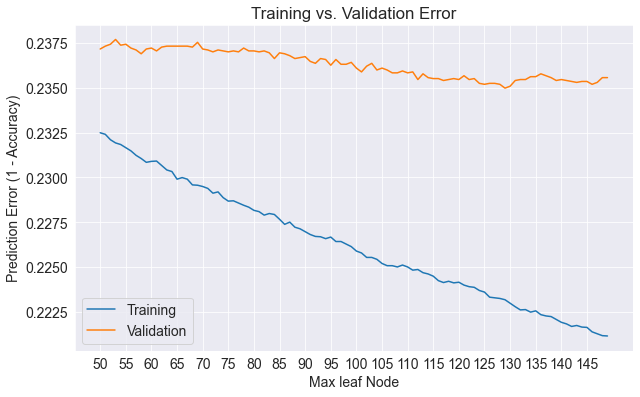

In [93]:
v = parameter_list[1]
plt.figure()
plt.plot(errors_df[v], errors_df['Training Error'])
plt.plot(errors_df[v], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(50,150, 5))
plt.xlabel('Max leaf Node')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [94]:
best_params[parameter_list[1]]=128

best_params

{'max_depth': 12, 'max_leaf_nodes': 128}

In [95]:
test_params(best_params)

(0.7767334005983042, 0.7648152081563296)

In [96]:
def error_df(para , md):
    model_acc = test_params({para:md},**best_params)
    train_acc = 1 - model_acc[0]
    val_acc = 1 - model_acc[1]
    return {para: md, 'Training Error': train_acc, 'Validation Error': val_acc }

In [97]:
errors_df = pd.DataFrame([error_df("n_estimators",md) for md in range(1, 100)])


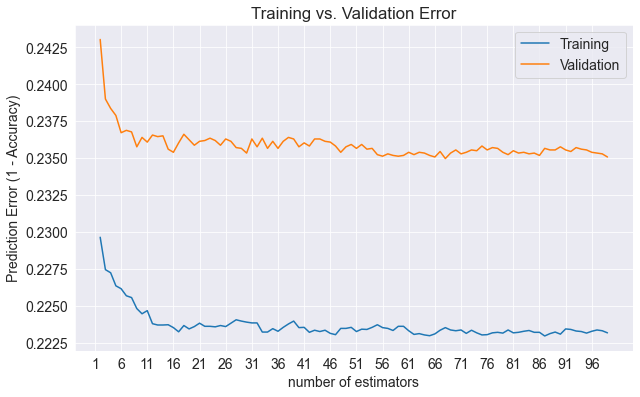

In [98]:
v = "n_estimators"
plt.figure()
plt.plot(errors_df[v].loc[1:100], errors_df['Training Error'].loc[1:100])
plt.plot(errors_df[v].loc[1:100], errors_df['Validation Error'].loc[1:100])
plt.title('Training vs. Validation Error')
plt.xticks(range(1,100, 5))
plt.xlabel('number of estimators')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [99]:
best_params["n_estimators"] = 68


In [100]:
def test_param(**param):
    m = RandomForestClassifier(random_state=42,**param)
    m.fit(X_train, train_targets)
    k = predict_and_plot(m,X_train, train_targets, 'Training')
    v = predict_and_plot(m,X_val, val_targets, 'Validatiaon')
    return k ,v


In [101]:
best_params

{'max_depth': 12, 'max_leaf_nodes': 128, 'n_estimators': 68}

Training Accuracy: 71.84%
Validatiaon Accuracy: 70.62%


(71.8389889012798, 70.61915887850468)

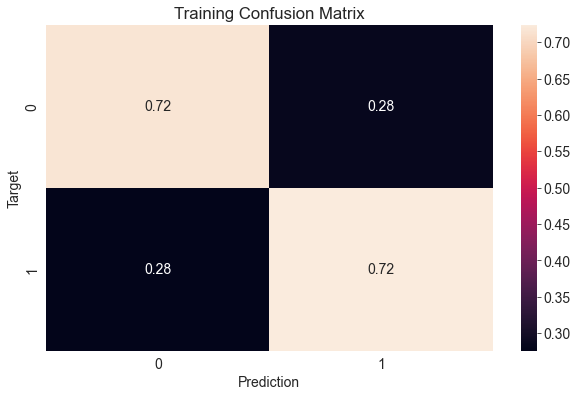

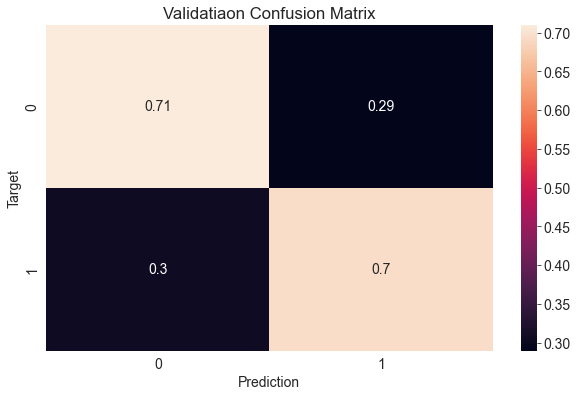

In [102]:
test_param(**best_params,class_weight = {1:2.53,0:1})

training Accuracy: 70.62%
accuracy :  0.5000000000000001
recall :  0.4946582513266451
precision :  0.7060369307355489
F1 :  0.581741309113686
Balanced Accuracy : 0.5036493475940416
average of all : 0.5572171677539843


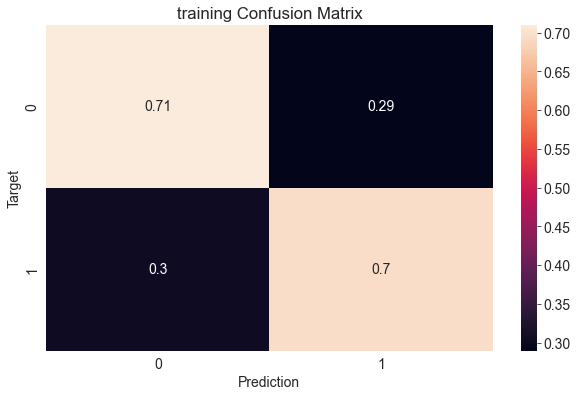

In [103]:

model = RandomForestClassifier(random_state=42,n_estimators= 68,max_depth=12,max_leaf_nodes=128,class_weight = {1:2.53,0:1})

model.fit(X_train,train_targets)
val_preds = model.predict(X_val)

accuracy = accuracy_score(val_targets,val_preds)
name = "training"
print(name + " Accuracy: {:.2f}%".format(accuracy * 100))

cf = confusion_matrix(val_targets,val_preds, normalize='true')
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('{} Confusion Matrix'.format(name));

a = cf[1][1]
b = cf[0][0]
c = cf[0][1]
d = cf[1][0]
accuracy = (a+d)/(a+b+c+d)
recall = a/(a+b)
precision = a/(a+c)

f1 = 2/((1/recall)+(1/precision))
balanced_accuracy = ((a/(a+b))+(d/(c+d)))/2


print("accuracy : ", accuracy)
print("recall : ", recall)
print("precision : " ,precision)
print("F1 : ", f1)
print("Balanced Accuracy :", balanced_accuracy )
print("average of all :", (accuracy+recall+precision+f1+balanced_accuracy)/5)

# Classification report

In [104]:
from sklearn.metrics import classification_report

In [105]:
print(classification_report(val_targets,val_preds))

              precision    recall  f1-score   support

           0       0.85      0.71      0.78     13490
           1       0.49      0.70      0.57      5342

    accuracy                           0.71     18832
   macro avg       0.67      0.70      0.67     18832
weighted avg       0.75      0.71      0.72     18832



### ROC Curve


Another tool to measure the classification model performance visually is **ROC Curve**. ROC Curve stands for **Receiver Operating Characteristic Curve**. An **ROC Curve** is a plot which shows the performance of a classification model at various 
classification threshold levels. 



The **ROC Curve** plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold levels.



**True Positive Rate (TPR)** is also called **Recall**. It is defined as the ratio of `TP to (TP + FN)`.



**False Positive Rate (FPR)** is defined as the ratio of `FP to (FP + TN)`.



In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).


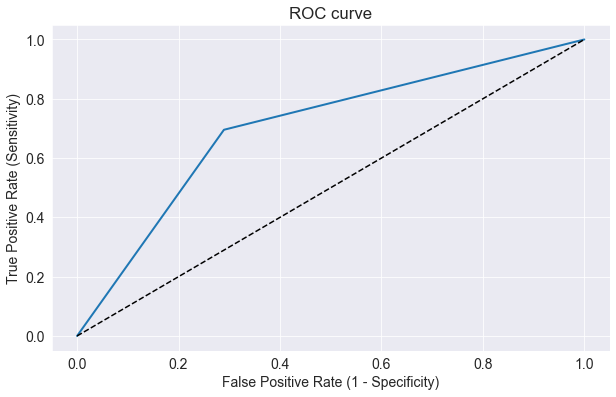

In [106]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(val_targets, val_preds)

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.title('ROC curve')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


In [107]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(val_targets, val_preds)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7029


In [108]:
frames1 = [X_train,X_val]
frames2 = [train_targets,val_targets] 
X = pd.concat(frames1)
Y = pd.concat(frames2)


In [109]:
ratio_1 = Y.value_counts()[0]/Y.value_counts()[1]
ratio_1

2.535389092274477

training Accuracy: 71.04%
accuracy :  0.5
recall :  0.5076295600464917
precision :  0.710532643520758
F1 :  0.5921828343924661
Balanced Accuracy : 0.49423838096564376
average of all : 0.5609166837850719


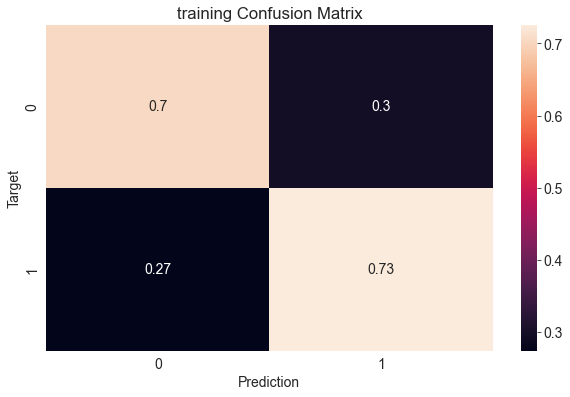

In [110]:
model = RandomForestClassifier(random_state=42,n_estimators= 68,max_depth=12,max_leaf_nodes=128,class_weight = {1:ratio_1
                                                                                                                ,0:1})

model.fit(X,Y)
val_preds = model.predict(X)

accuracy = accuracy_score(Y,val_preds)
name = "training"
print(name + " Accuracy: {:.2f}%".format(accuracy * 100))

cf = confusion_matrix(Y,val_preds, normalize='true')
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('{} Confusion Matrix'.format(name));

a = cf[1][1]
b = cf[0][0]
c = cf[0][1]
d = cf[1][0]
accuracy = (a+d)/(a+b+c+d)
recall = a/(a+b)
precision = a/(a+c)

f1 = 2/((1/recall)+(1/precision))
balanced_accuracy = ((a/(a+b))+(d/(c+d)))/2


print("accuracy : ", accuracy)
print("recall : ", recall)
print("precision : " ,precision)
print("F1 : ", f1)
print("Balanced Accuracy :", balanced_accuracy )
print("average of all :", (accuracy+recall+precision+f1+balanced_accuracy)/5)

### ROC  AUC


**ROC AUC** stands for **Receiver Operating Characteristic - Area Under Curve**. It is a technique to compare classifier performance. In this technique, we measure the `area under the curve (AUC)`. A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. 


So, **ROC AUC** is the percentage of the ROC plot that is underneath the curve.

In [111]:
ratio_1 = Y.value_counts()[0]/Y.value_counts()[1]
ratio_1

2.535389092274477

In [112]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=42,n_estimators= 68,max_depth=12,max_leaf_nodes=128,class_weight = {1:ratio_1,0:1})


Cross_validated_ROC_AUC = cross_val_score(model,X,Y, cv=4, scoring='roc_auc')
print(Cross_validated_ROC_AUC)

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC.mean()))

[0.76992917 0.77275566 0.76704667 0.76948168]
Cross validated ROC AUC : 0.7698


In [113]:
from sklearn.model_selection import KFold


kfold=KFold(n_splits=5, shuffle=True, random_state=43)


scores = cross_val_score(model, X, Y, cv=kfold)

In [114]:
scores

array([0.70116163, 0.70394955, 0.69605045, 0.70029871, 0.6990375 ])

In [115]:
print('Average stratified cross-validation score:{:.4f}'.format(scores.mean()))

Average stratified cross-validation score:0.7001


###  final model 

In [116]:
model = RandomForestClassifier(random_state=42,n_estimators= 68,max_depth=12,max_leaf_nodes=128,class_weight = {1:ratio_1,0:1})
model.fit(X,Y)

RandomForestClassifier(class_weight={0: 1, 1: 2.535389092274477}, max_depth=12,
                       max_leaf_nodes=128, n_estimators=68, random_state=42)

In [117]:
test_pred = model.predict(X_test)

In [118]:
test_pred

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [119]:
test_inputs["pred"] = test_pred
test_inputs

,application_key,mvar1,mvar3,mvar4,mvar5,mvar10,mvar14,mvar19,mvar20,mvar28,...,mvar33,mvar34,mvar36,mvar38,mvar42,mvar43,mvar47,mvar47_C,mvar47_L,pred
0,578069,-0.294165,0.268879,-0.278528,-0.193650,-0.476202,-0.024142,-0.569502,-0.037556,-0.637284,...,-0.253544,-0.347691,-0.665258,-0.609158,0.698348,-0.787187,C,1.0,0.0,1
1,578070,0.505476,-0.496904,-0.278528,-0.193650,-0.210369,0.010497,-0.569502,-0.601421,-0.580695,...,-0.525365,-0.347691,-0.856180,-0.095298,-0.390087,-0.468486,C,1.0,0.0,0
2,578071,-0.052168,-0.496904,-0.278528,-0.193650,-0.463083,-0.007053,-0.569502,-0.601421,-0.587471,...,-0.851540,-0.347691,-1.047101,-0.866087,0.994820,-0.946537,C,1.0,0.0,0
3,578072,-0.651899,1.759594,-0.278528,-0.193650,-0.430676,-0.007977,-0.569502,-0.601421,-0.637284,...,-0.873276,-0.347691,-0.092494,-0.609158,1.607779,-0.946537,C,1.0,0.0,1
5,578074,1.610242,-0.496904,-0.278528,-0.193650,-0.144254,-0.014905,-0.569502,-0.601421,1.625264,...,1.931827,-0.347691,-0.283415,-0.095298,-0.893135,0.487615,C,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46995,310027,-0.115298,-0.496904,-0.278528,-0.193650,-0.381116,0.022044,0.587863,0.526309,1.625264,...,-0.895025,-0.347691,-0.474337,-0.095298,-0.893135,-0.468486,C,1.0,0.0,1
46996,310028,-0.241557,-0.398505,0.160150,-0.193650,0.786804,-0.017676,0.009181,-0.037556,-0.612340,...,-0.090456,-0.347691,-0.283415,0.161631,-0.406834,1.125016,C,1.0,0.0,0
46997,310029,-1.493625,0.529795,0.256682,0.308673,-0.395490,-0.032918,-0.569502,-0.601421,-0.637284,...,-0.460130,2.535855,0.098428,0.161631,0.565737,-0.468486,C,1.0,0.0,1
46998,310030,0.347652,-0.496904,-0.278528,-0.193650,-0.209158,-0.016060,0.009181,-0.037556,-0.564835,...,-0.590600,-0.347691,-0.283415,0.932420,-0.716290,0.328265,L,0.0,1.0,0


In [120]:
predicted_for_not_missing = test_inputs[["application_key","pred"]].copy()
predicted_for_not_missing

,application_key,pred
0,578069,1
1,578070,0
2,578071,0
3,578072,1
5,578074,0
...,...,...
46995,310027,1
46996,310028,0
46997,310029,1
46998,310030,0


In [121]:
predicted_for_not_missing

,application_key,pred
0,578069,1
1,578070,0
2,578071,0
3,578072,1
5,578074,0
...,...,...
46995,310027,1
46996,310028,0
46997,310029,1
46998,310030,0


# model for missing values in test data

## Imputing Missing Numeric Data

Machine learning models can't work with missing numerical data. The process of filling missing values is called imputation.

<img src="https://i.imgur.com/W7cfyOp.png" width="480">

There are several techniques for imputation, but we'll use the most basic one: replacing missing values with the average value in the column using the `SimpleImputer` class from `sklearn.impute`.

In [122]:
from sklearn.impute import SimpleImputer

In [123]:
imputer = SimpleImputer(strategy = 'mean')

In [124]:
temp_miss_df[numeric_cols].isna().sum()

mvar1     3733
mvar3      535
mvar4      535
mvar5      535
mvar10     535
mvar14       0
mvar19       5
mvar20     535
mvar28     535
mvar29     535
mvar33    1869
mvar34     535
mvar36    3159
mvar38     535
mvar42    2023
mvar43     889
dtype: int64

In [125]:
imputer.fit(temp_miss_df[numeric_cols])

SimpleImputer()

In [126]:
temp_miss_df[numeric_cols] = imputer.transform(temp_miss_df[numeric_cols])


In [127]:
temp_test_miss_df[numeric_cols] = imputer.transform(temp_test_miss_df[numeric_cols])

In [128]:
train_miss_df,val_miss_df = train_test_split(temp_miss_df, test_size=0.25, random_state=42)
test_miss_df = temp_test_miss_df

In [129]:
target_col = 'default_ind'
input_cols = train_df.columns[0:-1]
input_cols

Index(['application_key', 'mvar1', 'mvar3', 'mvar4', 'mvar5', 'mvar10',
       'mvar14', 'mvar19', 'mvar20', 'mvar28', 'mvar29', 'mvar33', 'mvar34',
       'mvar36', 'mvar38', 'mvar42', 'mvar43', 'mvar47'],
      dtype='object')

In [130]:
train_miss_inputs = train_miss_df[input_cols].copy()
train_miss_targets = train_miss_df[target_col].copy()

In [131]:
val_miss_inputs = val_miss_df[input_cols].copy()
val_miss_targets = val_miss_df[target_col].copy()

In [132]:
test_miss_inputs = test_miss_df[input_cols].copy()


In [133]:
numeric_cols = train_miss_inputs.select_dtypes(include=np.number).columns.tolist()[1:]
categorical_cols = train_miss_inputs.select_dtypes('object').columns.tolist()

In [134]:
categorical_cols

['mvar47']

In [135]:
numeric_cols

['mvar1',
 'mvar3',
 'mvar4',
 'mvar5',
 'mvar10',
 'mvar14',
 'mvar19',
 'mvar20',
 'mvar28',
 'mvar29',
 'mvar33',
 'mvar34',
 'mvar36',
 'mvar38',
 'mvar42',
 'mvar43']

## Scaling Numeric Features

Another good practice is to scale numeric features to a small range of values e.g. $(0,1)$ or $(-1,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

The numeric columns in our dataset have varying ranges.



Because different columns have different ranges, we run into two issues:

1. We can't compare the weights of different column to identify which features are important
2. A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.

For this reason, it's common practice to scale (or standardize) the values in numeric column by subtracting the mean and dividing by the standard deviation.

![](https://i.imgur.com/dT5fLFI.png)

We can apply scaling using the StandardScaler class from `scikit-learn`.

In [136]:
from sklearn.preprocessing import StandardScaler

In [137]:
scaler = StandardScaler()

In [138]:
scaler.fit(temp_miss_df[numeric_cols])

StandardScaler()

In [139]:
train_miss_inputs[numeric_cols] = scaler.transform(train_miss_inputs[numeric_cols])
val_miss_inputs[numeric_cols] = scaler.transform(val_miss_inputs[numeric_cols])
test_miss_inputs[numeric_cols] = scaler.transform(test_miss_inputs[numeric_cols])

## Encoding Categorical Data

Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column. "

In [140]:
from sklearn.preprocessing import OneHotEncoder

In [141]:
encoder = OneHotEncoder(sparse = False,handle_unknown='ignore')

In [142]:
encoder.fit(temp_miss_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [143]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [144]:
train_miss_inputs[encoded_cols] = encoder.transform(train_miss_inputs[categorical_cols])
val_miss_inputs[encoded_cols] = encoder.transform(val_miss_inputs[categorical_cols])
test_miss_inputs[encoded_cols] = encoder.transform(test_miss_inputs[categorical_cols])

In [145]:
X_train_miss = train_miss_inputs[numeric_cols + encoded_cols]
X_val_miss = val_miss_inputs[numeric_cols + encoded_cols]
X_test_miss = test_miss_inputs[numeric_cols + encoded_cols]

## Random Forest Classifier

In [146]:
from sklearn.ensemble import RandomForestClassifier

In [147]:
def test_params(params={},**para):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params , **para).fit(X_train_miss, train_miss_targets)
    return model.score(X_train_miss, train_miss_targets), model.score(X_val_miss, val_miss_targets)

In [148]:
test_params()

(0.9994377510040161, 0.7611084337349397)

### Tuning hyper parameters

In [149]:
parameter_list = []

parameter_list.append("max_depth")

In [150]:
def error_df(para , md,parameters={}):
    model_acc = test_params({para:md},**parameters)
    train_acc = 1 - model_acc[0]
    val_acc = 1 - model_acc[1]
    return {para: md, 'Training Error': train_acc, 'Validation Error': val_acc }

In [151]:
%%time
errors_df = pd.DataFrame([error_df("max_depth",md) for md in range(1, 21)])

Wall time: 49.7 s


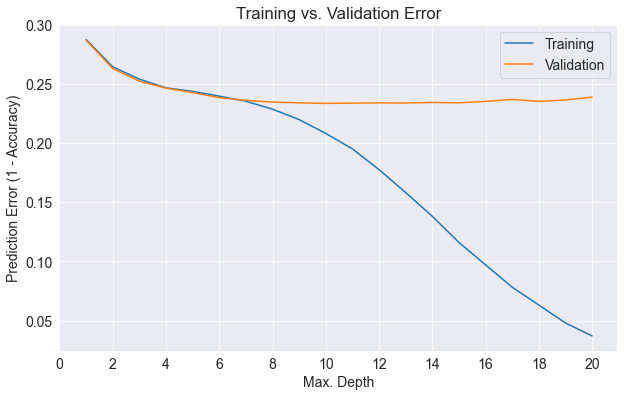

In [152]:
v = parameter_list[0]
plt.figure()
plt.plot(errors_df[v], errors_df['Training Error'])
plt.plot(errors_df[v], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [153]:
best_params = {
    "max_depth" :8
}

In [154]:
parameter_list.append("max_leaf_nodes")

In [155]:
errors_df = pd.DataFrame([error_df("max_leaf_nodes",md,best_params) for md in range(100,200,5)])

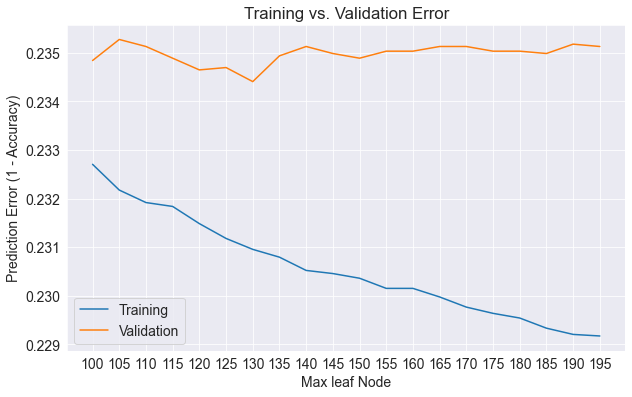

In [156]:
v = parameter_list[1]
plt.figure()
plt.plot(errors_df[v], errors_df['Training Error'])
plt.plot(errors_df[v], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(100,200, 5))
plt.xlabel('Max leaf Node')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [157]:
best_params[parameter_list[1]]=130

best_params

{'max_depth': 8, 'max_leaf_nodes': 130}

In [158]:
test_params(best_params)

(0.7690441767068273, 0.7655903614457832)

In [159]:
def error_df(para , md):
    model_acc = test_params({para:md},**best_params)
    train_acc = 1 - model_acc[0]
    val_acc = 1 - model_acc[1]
    return {para: md, 'Training Error': train_acc, 'Validation Error': val_acc }

In [160]:
errors_df = pd.DataFrame([error_df("n_estimators",md) for md in range(1, 100)])


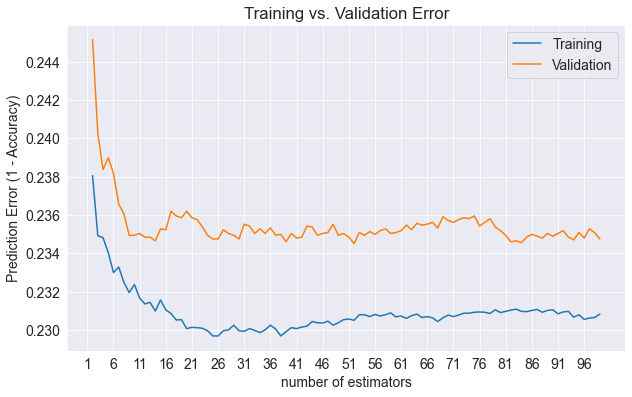

In [161]:
v = "n_estimators"
plt.figure()
plt.plot(errors_df[v].loc[1:100], errors_df['Training Error'].loc[1:100])
plt.plot(errors_df[v].loc[1:100], errors_df['Validation Error'].loc[1:100])
plt.title('Training vs. Validation Error')
plt.xticks(range(1,100, 5))
plt.xlabel('number of estimators')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [162]:
best_params["n_estimators"] = 83


In [163]:
def test_param(**param):
    m = RandomForestClassifier(random_state=42,**param)
    m.fit(X_train_miss, train_miss_targets)
    k = predict_and_plot(m,X_train_miss, train_miss_targets, 'Training')
    v = predict_and_plot(m,X_val_miss, val_miss_targets, 'Validatiaon')
    return k ,v


In [164]:
best_params

{'max_depth': 8, 'max_leaf_nodes': 130, 'n_estimators': 83}

Training Accuracy: 70.39%
Validatiaon Accuracy: 68.85%


(70.39196787148595, 68.84819277108434)

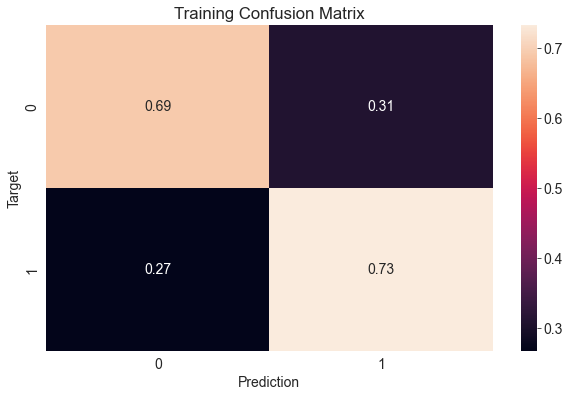

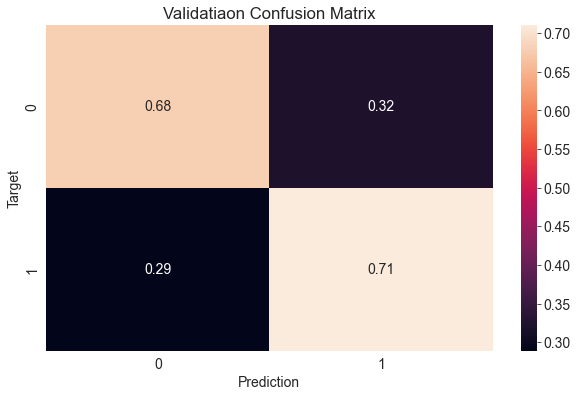

In [165]:
test_param(**best_params,class_weight = {1:2.47,0:1})

training Accuracy: 68.85%
accuracy :  0.5000000000000001
recall :  0.511415307121533
precision :  0.6892381775125742
F1 :  0.5871585078352516
Balanced Accuracy : 0.4926866021744299
average of all : 0.5560997189287578


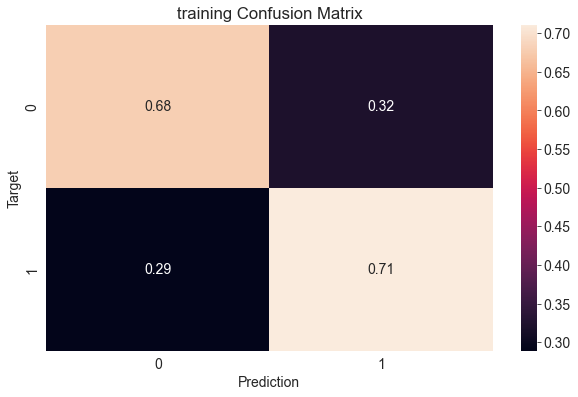

In [166]:
model = RandomForestClassifier(random_state=42,n_estimators = 83,max_depth=8,max_leaf_nodes=130,class_weight = {1:2.47,0:1})

model.fit(X_train_miss,train_miss_targets)
val_preds = model.predict(X_val_miss)
accuracy = accuracy_score(val_miss_targets,val_preds)
name = "training"
print(name + " Accuracy: {:.2f}%".format(accuracy * 100))

cf = confusion_matrix(val_miss_targets,val_preds, normalize='true')

plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('{} Confusion Matrix'.format(name));

a = cf[1][1]
b = cf[0][0]
c = cf[0][1]
d = cf[1][0]
accuracy = (a+d)/(a+b+c+d)
recall = a/(a+b)
precision = a/(a+c)

f1 = 2/((1/recall)+(1/precision))
balanced_accuracy = ((a/(a+b))+(d/(c+d)))/2


print("accuracy : ", accuracy)
print("recall : ", recall)
print("precision : " ,precision)
print("F1 : ", f1)
print("Balanced Accuracy :", balanced_accuracy )
print("average of all :", (accuracy+recall+precision+f1+balanced_accuracy)/5)

# Classification report

In [167]:
from sklearn.metrics import classification_report

In [168]:
print(classification_report(val_miss_targets,val_preds))

              precision    recall  f1-score   support

           0       0.85      0.68      0.76     14796
           1       0.47      0.71      0.57      5954

    accuracy                           0.69     20750
   macro avg       0.66      0.70      0.66     20750
weighted avg       0.74      0.69      0.70     20750



### ROC Curve


Another tool to measure the classification model performance visually is **ROC Curve**. ROC Curve stands for **Receiver Operating Characteristic Curve**. An **ROC Curve** is a plot which shows the performance of a classification model at various 
classification threshold levels. 



The **ROC Curve** plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold levels.



**True Positive Rate (TPR)** is also called **Recall**. It is defined as the ratio of `TP to (TP + FN)`.



**False Positive Rate (FPR)** is defined as the ratio of `FP to (FP + TN)`.



In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).


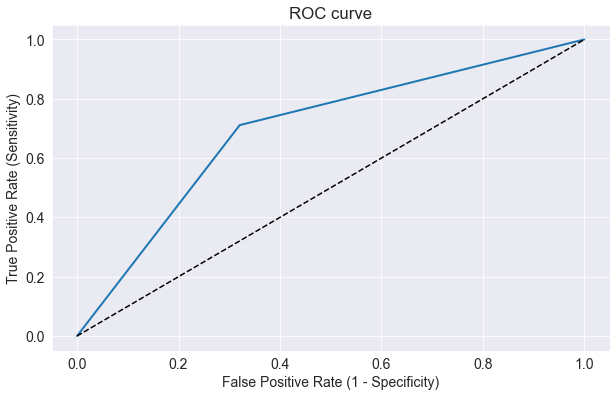

In [169]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(val_miss_targets, val_preds)

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.title('ROC curve')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


In [170]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(val_miss_targets, val_preds)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.6952


In [171]:
frames1 = [X_train_miss,X_val_miss]
frames2 = [train_miss_targets,val_miss_targets] 
X_miss = pd.concat(frames1)
Y_miss = pd.concat(frames2)



In [172]:
ratio_2 = Y_miss.value_counts()[0]/Y_miss.value_counts()[1]
ratio_2

2.479354433032907

training Accuracy: 70.08%
accuracy :  0.5
recall :  0.5130933622642587
precision :  0.7012405546226945
F1 :  0.5925913275152426
Balanced Accuracy : 0.4906185645635347
average of all : 0.5595087617931461


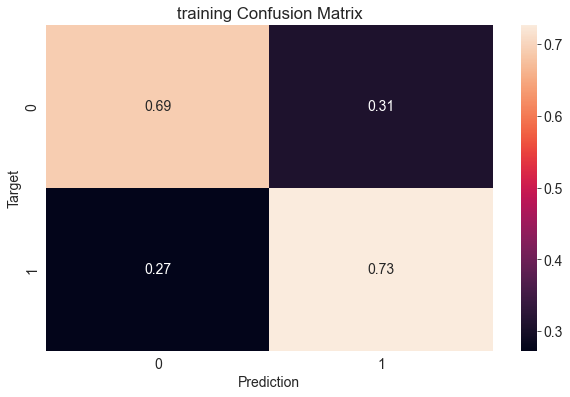

In [173]:
model = RandomForestClassifier(random_state=42,n_estimators = 83,max_depth=8,max_leaf_nodes=130,class_weight = {1:ratio_2,0:1})
model.fit(X_miss,Y_miss)
val_preds = model.predict(X_miss)

accuracy = accuracy_score(Y_miss,val_preds)
name = "training"
print(name + " Accuracy: {:.2f}%".format(accuracy * 100))

cf = confusion_matrix(Y_miss,val_preds, normalize='true')
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('{} Confusion Matrix'.format(name));

a = cf[1][1]
b = cf[0][0]
c = cf[0][1]
d = cf[1][0]
accuracy = (a+d)/(a+b+c+d)
recall = a/(a+b)
precision = a/(a+c)

f1 = 2/((1/recall)+(1/precision))
balanced_accuracy = ((a/(a+b))+(d/(c+d)))/2


print("accuracy : ", accuracy)
print("recall : ", recall)
print("precision : " ,precision)
print("F1 : ", f1)
print("Balanced Accuracy :", balanced_accuracy )
print("average of all :", (accuracy+recall+precision+f1+balanced_accuracy)/5)

### ROC  AUC


**ROC AUC** stands for **Receiver Operating Characteristic - Area Under Curve**. It is a technique to compare classifier performance. In this technique, we measure the `area under the curve (AUC)`. A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. 


So, **ROC AUC** is the percentage of the ROC plot that is underneath the curve.

In [174]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=42,n_estimators = 83,max_depth=8,max_leaf_nodes=130,class_weight = {1:ratio_2,0:1})


Cross_validated_ROC_AUC = cross_val_score(model,X_miss,Y_miss, cv=4, scoring='roc_auc')
print(Cross_validated_ROC_AUC)

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC.mean()))

[0.76774804 0.77276675 0.76578025 0.76713822]
Cross validated ROC AUC : 0.7684


In [175]:
from sklearn.model_selection import KFold


kfold=KFold(n_splits=5, shuffle=True, random_state=43)


scores = cross_val_score(model, X_miss, Y_miss, cv=kfold)

In [176]:
scores

array([0.69271084, 0.69391566, 0.68777108, 0.69831325, 0.695     ])

In [177]:
print('Average stratified cross-validation score:{:.4f}'.format(scores.mean()))

Average stratified cross-validation score:0.6935


## predicting for missing values

In [178]:
final_model = RandomForestClassifier(random_state=42,n_estimators = 83,max_depth=8,max_leaf_nodes=130,class_weight = {1:ratio_2,0:1})

In [179]:
model.fit(X_miss,Y_miss)

RandomForestClassifier(class_weight={0: 1, 1: 2.479354433032907}, max_depth=8,
                       max_leaf_nodes=130, n_estimators=83, random_state=42)

In [180]:
test_pred = model.predict(X_test_miss)

In [181]:
test_miss_inputs["pred"] = test_pred
test_miss_inputs

,application_key,mvar1,mvar3,mvar4,mvar5,mvar10,mvar14,mvar19,mvar20,mvar28,...,mvar33,mvar34,mvar36,mvar38,mvar42,mvar43,mvar47,mvar47_C,mvar47_L,pred
0,578069,-0.307663,0.291362,-0.271460,-0.189336,-0.453605,-0.018840,-0.544547,0.000864,-0.652126,...,-0.241036,-0.336652,-0.654199,-0.572528,0.579070,-0.729816,C,1.0,0.0,1
1,578070,0.512430,-0.488597,-0.271460,-0.189336,-0.183882,0.001173,-0.544547,-0.578710,-0.595876,...,-0.517380,-0.336652,-0.847677,-0.057614,-0.430824,-0.409272,C,1.0,0.0,0
2,578071,-0.059477,-0.488597,-0.271460,-0.189336,-0.440295,-0.008967,-0.544547,-0.578710,-0.602611,...,-0.848981,-0.336652,-1.041156,-0.829986,0.854148,-0.890089,C,1.0,0.0,0
3,578072,-0.674546,1.809675,-0.271460,-0.189336,-0.407413,-0.009501,-0.544547,-0.578710,-0.652126,...,-0.871079,-0.336652,-0.073763,-0.572528,1.422877,-0.890089,C,1.0,0.0,1
4,578073,-0.879569,-0.488597,-0.271460,-0.189336,-0.449618,-0.019774,-0.544547,-0.578710,-0.652126,...,-0.904239,-0.336652,-1.041156,-0.572528,0.000000,-1.050361,L,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46995,310027,-0.124221,-0.488597,-0.271460,-0.189336,-0.357128,0.007845,0.645475,0.580439,1.596829,...,-0.893190,-0.336652,-0.460720,-0.057614,-0.897572,-0.409272,C,1.0,0.0,1
46996,310028,-0.253709,-0.388378,0.180629,-0.189336,0.827883,-0.015104,0.050464,0.000864,-0.627332,...,-0.075236,-0.336652,-0.267241,0.199844,-0.446363,1.193451,C,1.0,0.0,0
46997,310029,-1.537801,0.557108,0.280112,0.330460,-0.371712,-0.023911,-0.544547,-0.578710,-0.652126,...,-0.451060,2.634770,0.119716,0.199844,0.456027,-0.409272,C,1.0,0.0,1
46998,310030,0.350569,-0.488597,-0.271460,-0.189336,-0.182654,-0.014171,0.050464,0.000864,-0.580111,...,-0.583700,-0.336652,-0.267241,0.972216,-0.733489,0.392089,L,0.0,1.0,0


In [182]:
predicted_for_missing = test_miss_inputs[["application_key","pred"]].copy()


In [183]:
predicted_for_missing

,application_key,pred
0,578069,1
1,578070,0
2,578071,0
3,578072,1
4,578073,0
...,...,...
46995,310027,1
46996,310028,0
46997,310029,1
46998,310030,0


joing all



In [184]:
submission = pd.read_csv('submission.csv',header=None)

In [185]:
submission

,0,1
0,578069,0
1,578070,1
2,578071,1
3,578072,1
4,578073,0
...,...,...
46995,310027,0
46996,310028,0
46997,310029,1
46998,310030,1


In [186]:
submission.loc[0,1]

0

In [187]:
for i in range(len(submission)):
    try:
        submission.loc[i,1] = predicted_for_not_missing.loc[i,"pred"]
    except:
        submission.loc[i,1] = predicted_for_missing.loc[i,"pred"]
    

In [188]:
submission.head(25)

,0,1
0,578069,1
1,578070,0
2,578071,0
3,578072,1
4,578073,0
5,578074,0
6,578075,0
7,578076,1
8,578077,1
9,578078,0


In [189]:
predicted_for_not_missing.head(20)

,application_key,pred
0,578069,1
1,578070,0
2,578071,0
3,578072,1
5,578074,0
6,578075,0
7,578076,1
8,578077,1
9,578078,0
11,578080,1


In [190]:
predicted_for_missing.head(25)

,application_key,pred
0,578069,1
1,578070,0
2,578071,0
3,578072,1
4,578073,0
5,578074,0
6,578075,0
7,578076,1
8,578077,1
9,578078,0


In [191]:
submission.to_csv("group_25_final.csv",header=False,index=False)